In [53]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
datapath = os.path.join(os.getcwd(), 'train.csv')
data = pd.read_csv(datapath)

In [4]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X = data[['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LandContour', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'GrLivArea']]

In [6]:
X.head()

,MSSubClass,LotFrontage,LotArea,Street,LandContour,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea
0,60,65.0,8450,Pave,Lvl,2003,856,854,1710
1,20,80.0,9600,Pave,Lvl,1976,1262,0,1262
2,60,68.0,11250,Pave,Lvl,2001,920,866,1786
3,70,60.0,9550,Pave,Lvl,1915,961,756,1717
4,60,84.0,14260,Pave,Lvl,2000,1145,1053,2198


In [7]:
X_1hot = pd.get_dummies(X)

In [8]:
X_1hot.head(5)

,MSSubClass,LotFrontage,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,65.0,8450,2003,856,854,1710,0,1,0,0,0,1
1,20,80.0,9600,1976,1262,0,1262,0,1,0,0,0,1
2,60,68.0,11250,2001,920,866,1786,0,1,0,0,0,1
3,70,60.0,9550,1915,961,756,1717,0,1,0,0,0,1
4,60,84.0,14260,2000,1145,1053,2198,0,1,0,0,0,1


In [16]:
y = data['SalePrice']

In [22]:
print("Checking for NaN values in SalePrice... Number of NaN values:")
print(y.isna().sum())
print("Checking for NaN values in X... Number of NaN values:")
print(X_1hot.isna().sum())

Checking for NaN values in SalePrice... Number of NaN values:
0
Checking for NaN values in X... Number of NaN values:
MSSubClass           0
LotFrontage        259
LotArea              0
YearBuilt            0
1stFlrSF             0
2ndFlrSF             0
GrLivArea            0
Street_Grvl          0
Street_Pave          0
LandContour_Bnk      0
LandContour_HLS      0
LandContour_Low      0
LandContour_Lvl      0
dtype: int64


In [25]:
X_1hot = X_1hot.fillna(0)
print("NaN values in the data has been replaced with the number 0.")

NaN values in the data has been replaced with the number 0.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_1hot, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [27]:
reg = LinearRegression().fit(X_train, y_train)

In [29]:
reg.coef_

array([-1.55935694e+02,  9.27575475e+01,  5.41657229e-01,  9.40120193e+02,
        6.00686657e+01,  2.25301228e+01,  6.03154453e+01, -1.76798889e+04,
        1.76798889e+04, -1.19140603e+04,  1.78245099e+04, -2.13267424e+03,
       -3.77777533e+03])

In [31]:
prediction = reg.predict(X_test)

In [36]:
prediction

(292,)

In [37]:
y_test

(292,)

In [39]:
diff = prediction - y_test

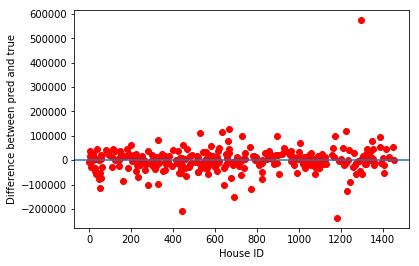

In [60]:
plt.plot(diff, 'ro')
plt.xlabel('House ID')
plt.ylabel('Difference between pred and true')
plt.axhline(y=0)
plt.show()

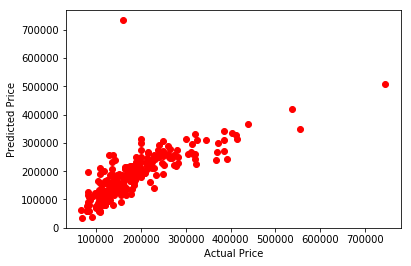

In [68]:
plt.plot(y_test, prediction, 'ro')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [54]:
# Mean square error
mean_squared_error(y_test, prediction)

3004321976.6066113